## Streaming

<p1>Methods: .stream() and astream()</p1>
- These methods are sync and async methods for streaming back results
<br>

<p1>Additional parameters in Streaming modes for graph state</p1>

- Values: This streams the full state of the graph after each node is called
- updates: This streams updates to the state of the graph after each node is called

In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

from dotenv import load_dotenv
load_dotenv()

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model='gpt-4.1-nano')
llm.invoke("Hello").content

'Hello! How can I assist you today?'

### We Will Start With Creating Nodes



In [3]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

def superbot(state:State):
    return {"messages": [llm.invoke(state["messages"])]}

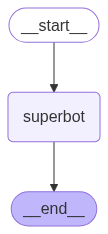

In [4]:
graph = StateGraph(state_schema=State)

## node
graph.add_node('superbot', superbot)

## edges
graph.add_edge(START,'superbot')
graph.add_edge('superbot',END)


from IPython.display import Image, display
graph = graph.compile(checkpointer=memory)

display(Image(graph.get_graph().draw_mermaid_png()))

In [5]:
## Invocation
config = {'configurable': {'thread_id':'1'}}

graph.invoke(
    {
        'messages':'hi, my name is Rahul and I like OnePiece'
    },
    config=config
)

{'messages': [HumanMessage(content='hi, my name is Rahul and I like OnePiece', additional_kwargs={}, response_metadata={}, id='a6c3eafd-e645-4192-8e2a-1ebbfba02b12'),
  AIMessage(content="Hi Rahul! It's great to meet a One Piece fan. Who's your favorite character in the series?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 18, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BreJrXf1wvHf0BkGLysBO6tScumAW', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--1c5ab56f-4d94-41c9-a6fa-17b470505781-0', usage_metadata={'input_tokens': 18, 'output_tokens': 21, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read':

## Streaming the Response with stream methods

In [6]:
# Create a thread
config = {'configurable':{'thread_id':'2'}}

In [7]:
for chunk in graph.stream({
        'messages':'hi, my name is Rahul and I like OnePiece'
    },
    config=config,
    stream_mode='updates'):
    print(chunk)


{'superbot': {'messages': [AIMessage(content="Hi Rahul! It's great to meet a One Piece fan. Who's your favorite character in the series?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 18, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BreJtzC07FyfBDrp8ALrUwTWejZAQ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--344eae82-9e1a-49b0-905f-1d7d358ac40b-0', usage_metadata={'input_tokens': 18, 'output_tokens': 21, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [8]:
for chunk in graph.stream({
        'messages':'hi, my name is Rahul and I like OnePiece'
    },
    config=config,
    stream_mode='values'):
    print(chunk)

{'messages': [HumanMessage(content='hi, my name is Rahul and I like OnePiece', additional_kwargs={}, response_metadata={}, id='e20d98fe-40e1-4b83-9213-cdaa462aede7'), AIMessage(content="Hi Rahul! It's great to meet a One Piece fan. Who's your favorite character in the series?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 18, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BreJtzC07FyfBDrp8ALrUwTWejZAQ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--344eae82-9e1a-49b0-905f-1d7d358ac40b-0', usage_metadata={'input_tokens': 18, 'output_tokens': 21, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0

In [9]:
for chunk in graph.stream({
        'messages':'i like zoro'
    },
    config=config,
    stream_mode='updates'):
    print(chunk)

{'superbot': {'messages': [AIMessage(content="That's awesome, Rahul! Zoro is a fantastic character—strong, skilled, and always determined. Do you have a favorite Zoro moment or fight?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 31, 'prompt_tokens': 100, 'total_tokens': 131, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BreJxJTaz59HPCSzVyx153USnIL1b', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--105137c3-b33a-47d6-920b-9364dbec3e4a-0', usage_metadata={'input_tokens': 100, 'output_tokens': 31, 'total_tokens': 131, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [10]:
for chunk in graph.stream({
        'messages':'i also like Bon Chan'
    },
    config=config,
    stream_mode='values'):
    print(chunk)

{'messages': [HumanMessage(content='hi, my name is Rahul and I like OnePiece', additional_kwargs={}, response_metadata={}, id='e20d98fe-40e1-4b83-9213-cdaa462aede7'), AIMessage(content="Hi Rahul! It's great to meet a One Piece fan. Who's your favorite character in the series?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 18, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BreJtzC07FyfBDrp8ALrUwTWejZAQ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--344eae82-9e1a-49b0-905f-1d7d358ac40b-0', usage_metadata={'input_tokens': 18, 'output_tokens': 21, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0

In [11]:
config = {'configurable':{'thread_id':'123'}}
for chunk in graph.stream({
        'messages':'i am rahul i like one piece'
    },
    config=config,
    stream_mode='values'):
    print(chunk)
    

{'messages': [HumanMessage(content='i am rahul i like one piece', additional_kwargs={}, response_metadata={}, id='e3a3e37b-8a8a-43d4-ba35-527ee939ca4d')]}
{'messages': [HumanMessage(content='i am rahul i like one piece', additional_kwargs={}, response_metadata={}, id='e3a3e37b-8a8a-43d4-ba35-527ee939ca4d'), AIMessage(content="Hi Rahul! That's great to hear you like One Piece. It's a fantastic series with such amazing characters and adventures. Do you have a favorite character or moment from the series?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 15, 'total_tokens': 50, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BreJzrxqb9EUjgBIuejU2b2ApygiV', 'service_tier': 'd

In [12]:
for chunk in graph.stream({
        'messages':'i like that gay guy Bon Chan who saved luffy'
    },
    config=config,
    stream_mode='values'):
    print(chunk)

{'messages': [HumanMessage(content='i am rahul i like one piece', additional_kwargs={}, response_metadata={}, id='e3a3e37b-8a8a-43d4-ba35-527ee939ca4d'), AIMessage(content="Hi Rahul! That's great to hear you like One Piece. It's a fantastic series with such amazing characters and adventures. Do you have a favorite character or moment from the series?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 35, 'prompt_tokens': 15, 'total_tokens': 50, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-nano-2025-04-14', 'system_fingerprint': 'fp_38343a2f8f', 'id': 'chatcmpl-BreJzrxqb9EUjgBIuejU2b2ApygiV', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--bfddd54f-108b-4e44-b140-ac85ce75d0a9-0', usage_metadata={'input_tokens': 15, 'output_tokens':

### Streaming The Responses With astream Method

Streaming tokens We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the tokens as they are generated.

We can do this using the .astream_events method, which streams back events as they happen inside nodes!

Each event is a dict with a few keys:

- event: This is the type of event that is being emitted.
- name: This is the name of event.
- data: This is the data associated with the event.
- metadata: Contains langgraph_node, the node emitting the event.

In [13]:
config = {'configurable':{"thread_id":"11"}}

async for event in graph.astream_events({'messages':['hi my name is Rahul And I like One piece']}, config=config):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['hi my name is Rahul And I like One piece']}}, 'name': 'LangGraph', 'tags': [], 'run_id': 'e3b067ad-f8ca-4ec9-be9c-8503f5aa1d5a', 'metadata': {'thread_id': '11'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='hi my name is Rahul And I like One piece', additional_kwargs={}, response_metadata={}, id='a287f4f0-d2b8-42c8-87c5-778b6d1bd6d2')]}}, 'name': 'superbot', 'tags': ['graph:step:1'], 'run_id': 'edb5fbf8-6106-40cc-b7ca-98c3106ee02a', 'metadata': {'thread_id': '11', 'langgraph_step': 1, 'langgraph_node': 'superbot', 'langgraph_triggers': ('branch:to:superbot',), 'langgraph_path': ('__pregel_pull', 'superbot'), 'langgraph_checkpoint_ns': 'superbot:4e0526b6-647c-1e5b-e84a-42e7632ceaaa'}, 'parent_ids': ['e3b067ad-f8ca-4ec9-be9c-8503f5aa1d5a']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='hi my name is Rahul And I like One piece', addi